In [2]:
# Import modules
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
#import scikitplot as skplt
 
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
#from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
 
#from imblearn.over_sampling import SMOTENC

In [4]:
data=pd.read_excel("default of credit card clients.xls")

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.shape

(30000, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
data = data.drop(columns=["ID"], axis=1)
print("Data Shape is :", data.shape)
data.head()

Data Shape is : (30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
#rename prediction column as target
data= data.rename(columns={"default payment next month": "target"})

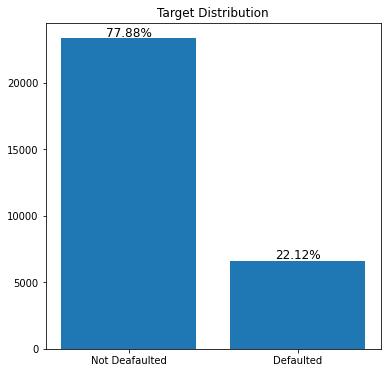

In [10]:
# Percentage of people who have Deafulted and not Defaulted

target_count = data.groupby('target').size().reset_index(name='counts')

plt.figure(figsize=(6,6))
plt.bar(target_count['target'], target_count.counts)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

total = len(data['target'])
not_def = len(data[data['target']==0])/total *100
yes_def = len(data[data['target']==1])/total *100

plt.text(x=0, y=not_def,s=str("%.2f"%not_def+'%'), fontsize=12, position=(0,len(data[data['target']==0])*1.006), horizontalalignment='center')
plt.text(x=1, y=yes_def,s=str("%.2f"%yes_def+'%'), fontsize=12, position=(1,len(data[data['target']==1])*1.02), horizontalalignment='center')

plt.show()

This is a unbalanced dataset

<Figure size 432x432 with 0 Axes>

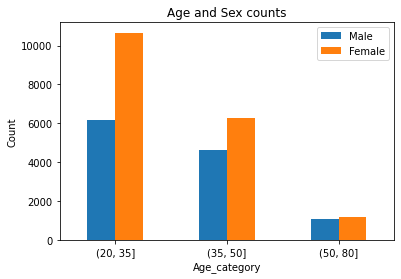

In [11]:
data['Age_category'] = pd.cut(data.AGE, bins=[20,35,50,80])

target_count = data.groupby(['Age_category','SEX']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.title("Age and Sex counts")
plt.show()

In all age groups,female have high chance to get credit cards

<Figure size 432x432 with 0 Axes>

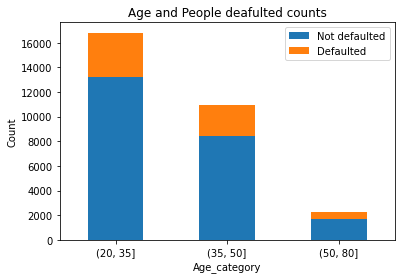

In [12]:
target_count = data.groupby(['Age_category','target']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Age and People deafulted counts")
plt.show()

most of the people,below 50 have high chance to get defaulted

<Figure size 432x432 with 0 Axes>

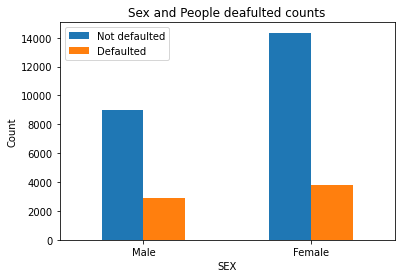

In [13]:
target_count = data.groupby(['SEX','target']).SEX.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Sex and People deafulted counts")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


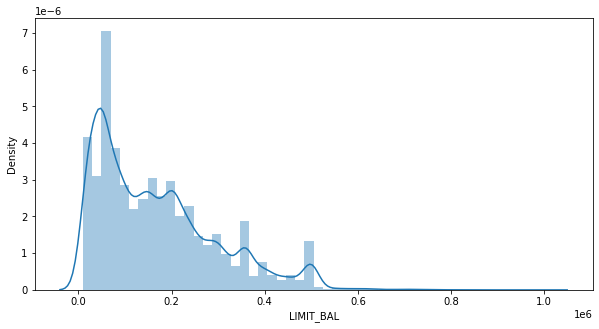

In [14]:
plt.subplots(figsize=(10,5))
# plt.subplot(121)
sns.distplot(data.LIMIT_BAL)
plt.show()

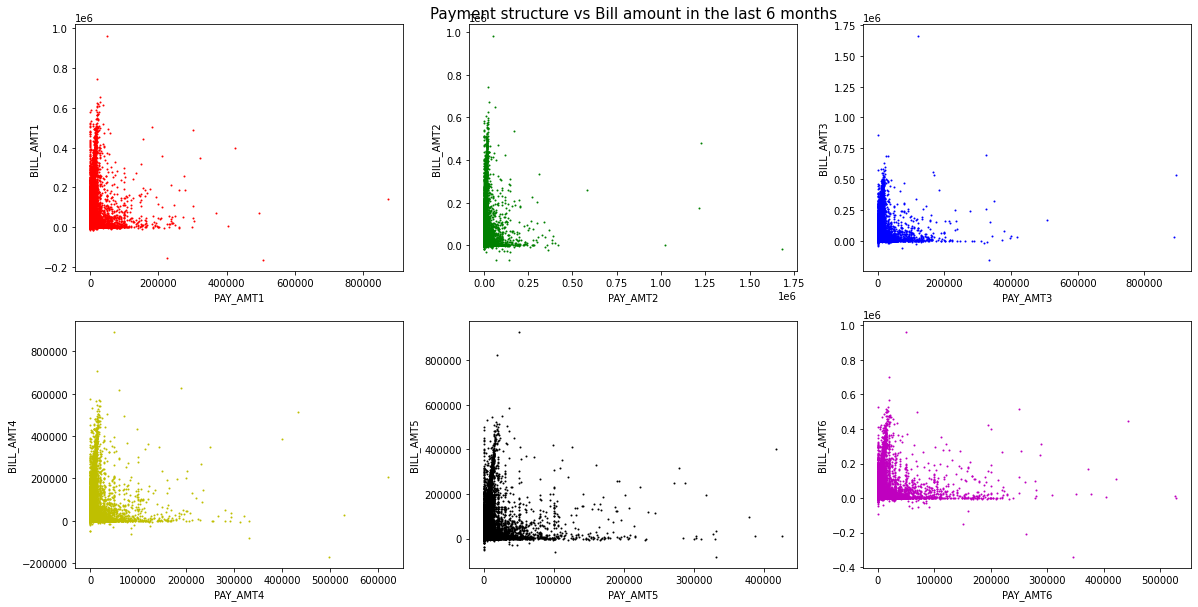

In [15]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=data.PAY_AMT1, y=data.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=data.PAY_AMT2, y=data.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=data.PAY_AMT3, y=data.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=data.PAY_AMT4, y=data.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=data.PAY_AMT5, y=data.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=data.PAY_AMT6, y=data.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

Feature Engineering

In [16]:
def f(x):
    if (x == -2):
        return -2
    elif (x == -1):
        return -1
    elif (x == 0):
        return 0
    else:
        return 1

In [17]:
data['PAY_0'] = data['PAY_0'].apply(f)
data['PAY_2'] = data['PAY_2'].apply(f)
data['PAY_3'] = data['PAY_3'].apply(f)
data['PAY_4'] = data['PAY_4'].apply(f)
data['PAY_5'] = data['PAY_5'].apply(f)
data['PAY_6'] = data['PAY_6'].apply(f)

In [18]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,Age_category
0,20000,2,2,1,24,1,1,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,"(20, 35]"
1,120000,2,2,2,26,-1,1,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,"(20, 35]"
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,"(20, 35]"
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,"(35, 50]"
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,"(50, 80]"


In [19]:
#x=train
x = data.drop(['target','Age_category'], axis = 1)
y = data['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [21]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [22]:
from xgboost import XGBClassifier
#import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time

In [23]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 81.22
Time consumed for training: 3.234
Time consumed for prediction: 0.01245 seconds


Training Accuracy : 0.884125
Testing Accuracy : 0.8121666666666667
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4703
           1       0.61      0.36      0.46      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



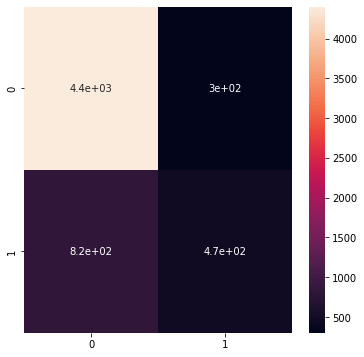

In [24]:
y_pred =xgb.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# evaluating the model
print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :",xgb.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Recall is very low

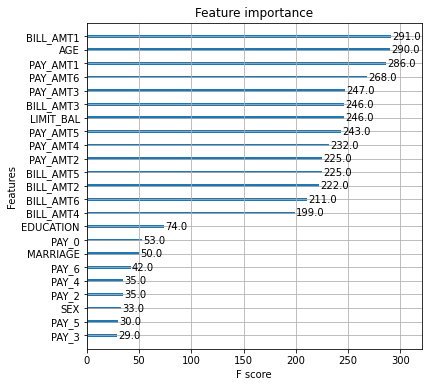

In [25]:
#feature importance with xgboost
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb)
pyplot.show()

Sampling method

In [26]:
#one to one resampling
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from collections import Counter

sm = SMOTENC(random_state=0,categorical_features=[1,2,3,5,6,7,8,9,10])
#sm=SMOTE(random_state=0)
X_resampled, y_resampled =sm.fit_resample(X_train,y_train)
print('Dataset after resampling:')
print(sorted(Counter(y_resampled).items()))

Dataset after resampling:
[(0, 18661), (1, 18661)]


In [27]:
print("Shape of x:",X_resampled.shape)
print("Shape of y:", y_resampled.shape)

Shape of x: (37322, 23)
Shape of y: (37322,)


In [28]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_resampled, y_resampled)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 77.28
Time consumed for training: 5.217
Time consumed for prediction: 0.02063 seconds


Training Accuracy : 0.85975
Testing Accuracy : 0.7728333333333334
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4703
           1       0.47      0.48      0.48      1297

    accuracy                           0.77      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.77      0.77      0.77      6000



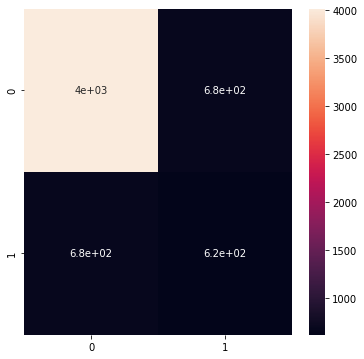

In [29]:
y_pred =xgb.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# evaluating the model
print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :",xgb.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

improvement in recall values

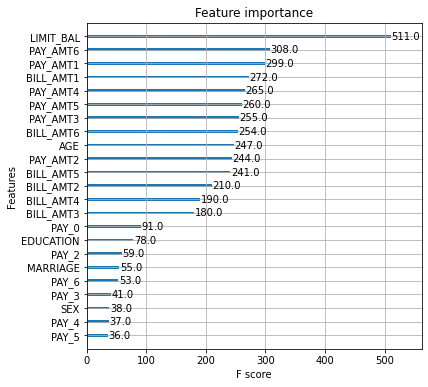

In [30]:
#feature importance with xgboost
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb)
pyplot.show()

In [31]:
#predict probabilities
print(xgb.predict_proba(X_test))

[[0.354672   0.645328  ]
 [0.5692184  0.43078157]
 [0.43550962 0.5644904 ]
 ...
 [0.5622803  0.43771973]
 [0.12274379 0.8772562 ]
 [0.84397984 0.1560202 ]]
